### 1. Import required libraries

In [1060]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,roc_auc_score
from pickle import dump
from pickle import load

import warnings
warnings.filterwarnings('ignore')

### 2. Import Data

In [792]:
sk_data = datasets.load_wine()
print(sk_data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [793]:
wine_df = pd.DataFrame(data=sk_data.data,columns=sk_data.feature_names)
wine_df["target"] = sk_data.target
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### 3. Data Understanding

In [794]:
wine_df.shape

(178, 14)

In [795]:
wine_df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [796]:
wine_df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int32
dtype: object

In [797]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [798]:
wine_df.nunique()

alcohol                         126
malic_acid                      133
ash                              79
alcalinity_of_ash                63
magnesium                        53
total_phenols                    97
flavanoids                      132
nonflavanoid_phenols             39
proanthocyanins                 101
color_intensity                 132
hue                              78
od280/od315_of_diluted_wines    122
proline                         121
target                            3
dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

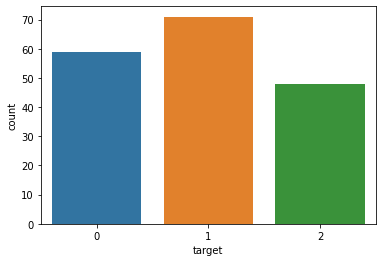

In [799]:
sns.countplot(x="target",hue=None,data=wine_df,)

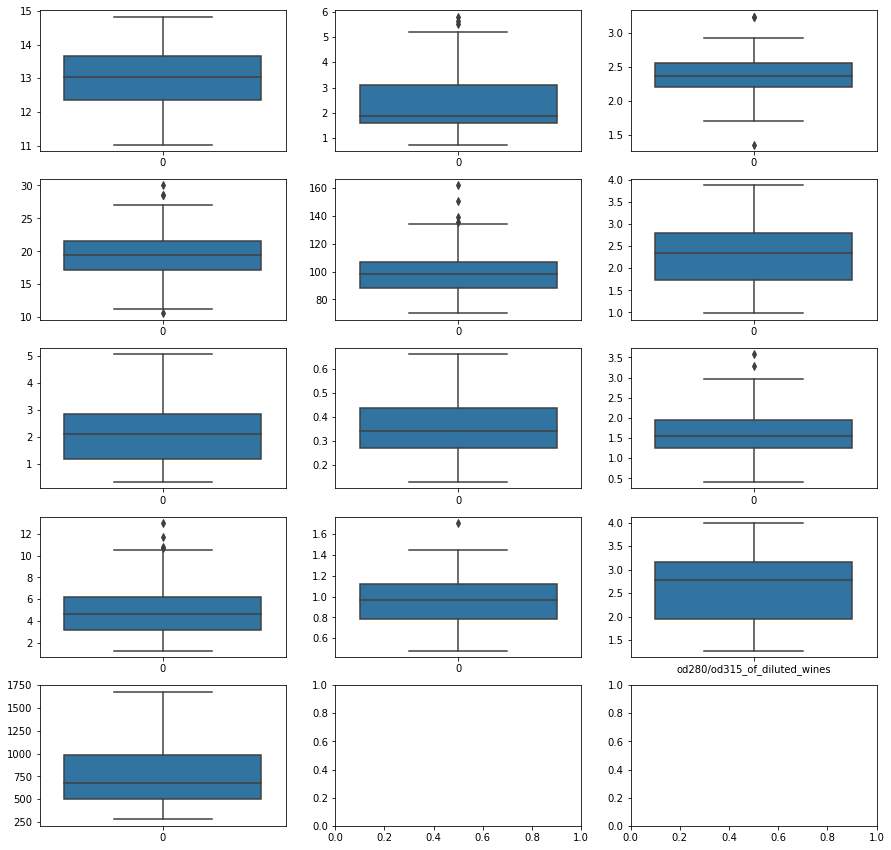

In [800]:
fig, ax = plt.subplots(5,3,figsize=(15,15))
sns.boxplot(data=wine_df.alcohol,ax=ax[0,0])
sns.boxplot(data=wine_df.malic_acid,ax=ax[0,1])
sns.boxplot(data=wine_df.ash,ax=ax[0,2])
sns.boxplot(data=wine_df.alcalinity_of_ash,ax=ax[1,0])
sns.boxplot(data=wine_df.magnesium,ax=ax[1,1])
sns.boxplot(data=wine_df.total_phenols,ax=ax[1,2])
sns.boxplot(data=wine_df.flavanoids,ax=ax[2,0])
sns.boxplot(data=wine_df.nonflavanoid_phenols,ax=ax[2,1])
sns.boxplot(data=wine_df.proanthocyanins,ax=ax[2,2])
sns.boxplot(data=wine_df.color_intensity,ax=ax[3,0])
sns.boxplot(data=wine_df.hue,ax=ax[3,1])
sns.boxplot(data=wine_df.iloc[:,11:12],ax=ax[3,2])
sns.boxplot(data=wine_df.proline,ax=ax[4,0])
plt.show()

### 4. Data Preparation

In [801]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


### 5. Model Building

In [802]:
X = wine_df.drop(labels="target",axis=1)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [803]:
y = wine_df[["target"]]
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [960]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=123,shuffle=True)
print(X_train.shape,X_test.shape)

(124, 13) (54, 13)


In [961]:
y_train.head()

,target
52,0
62,1
125,1
63,1
7,0


In [962]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
52,13.82,1.75,2.42,14.0,111.0,3.88,3.74,0.32,1.87,7.05,1.01,3.26,1190.0
62,13.67,1.25,1.92,18.0,94.0,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630.0
125,12.07,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0
63,12.37,1.13,2.16,19.0,87.0,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


### 6. Model Training

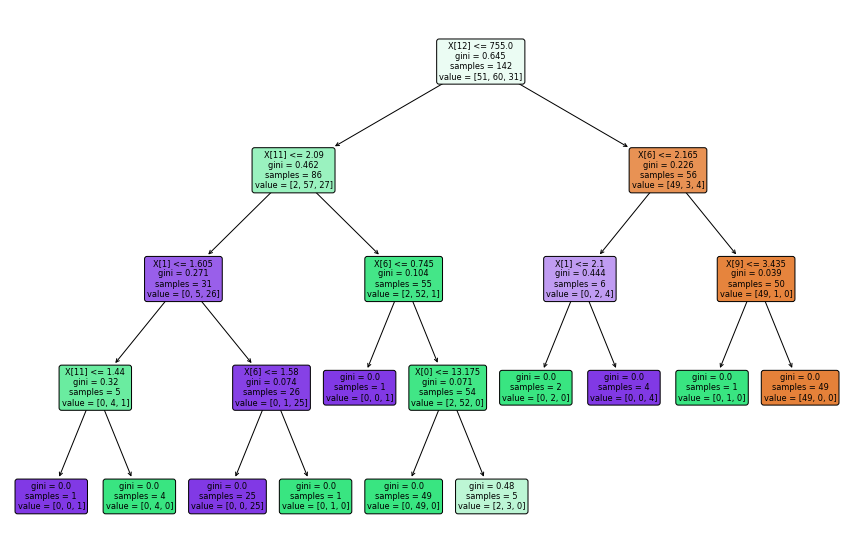

In [963]:
plt.figure(figsize=(15,10))
plot_tree(dt_model,filled=True,rounded=True)
plt.show()

#### 6.1 Grid Search CV

In [964]:
from sklearn.model_selection import GridSearchCV
#Exhaustive search over specified parameter values for an estimator.
grid_search = GridSearchCV(estimator = dt_model,
                           param_grid = {'criterion':['entropy','gini'],
                                       'max_depth':[3,4,5] },
                           cv=5)
grid_search.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=4),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 4, 5]})

In [965]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [966]:
dt_model = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=3)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

### 7. Model Testing

In [967]:
y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)

In [968]:
y_pred_train 

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 2, 0, 0, 0, 2,
       1, 1, 1, 2, 0, 0, 1, 1, 1, 2, 2, 0, 2, 2, 1, 2, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0,
       2, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 1, 1, 1, 2, 2, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 0, 0, 0, 1, 2, 1, 2, 2, 1, 0,
       1, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1])

### 8. Model Evluation

#### 8.1 Training Data

In [969]:
print("Accuracy Score            : ",accuracy_score(y_train,y_pred_train))
print("Confusion Matrix          : \n",confusion_matrix(y_train,y_pred_train))
print("Classification Report     : \n",classification_report(y_train,y_pred_train))

Accuracy Score            :  0.9758064516129032
Confusion Matrix          : 
 [[45  0  0]
 [ 2 51  0]
 [ 0  1 25]]
Classification Report     : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        45
           1       0.98      0.96      0.97        53
           2       1.00      0.96      0.98        26

    accuracy                           0.98       124
   macro avg       0.98      0.97      0.98       124
weighted avg       0.98      0.98      0.98       124



In [996]:
y_train

,target
52,0
62,1
125,1
63,1
7,0
...,...
17,0
98,1
66,1
126,1


In [998]:
y_pred_train1 = pd.DataFrame(data=y_pred_train,columns=["target"])

In [1047]:
dt_model.predict_proba(X_train)

array([[1.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        ],
       [0.        , 0.97826087, 0.02173913],
       [0.        , 0.97826087, 0.02173913],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.97826087, 0.02173913],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.97826087, 0.02173913],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.

0.9949342925076563


Text(0, 0.5, 'True Positive Rate')

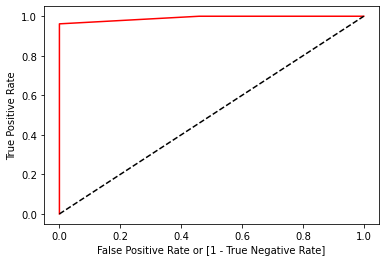

In [1059]:
fpr, tpr, thresholds = roc_curve(y_train, dt_model.predict_proba (X_train)[:,2],pos_label=2)

auc = roc_auc_score(y_train,dt_model.predict_proba(X_train),average='weighted',multi_class="ovr",labels=[0,1,2])
print(auc)


import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red',label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

#### 8.2 Test Data

In [971]:
print("Accuracy Score            : ",accuracy_score(y_test,y_pred_test))
print("Confusion Matrix          : \n",confusion_matrix(y_test,y_pred_test))
print("Classification Report     : \n",classification_report(y_test,y_pred_test))

Accuracy Score            :  0.8888888888888888
Confusion Matrix          : 
 [[14  0  0]
 [ 2 16  0]
 [ 2  2 18]]
Classification Report     : 
               precision    recall  f1-score   support

           0       0.78      1.00      0.88        14
           1       0.89      0.89      0.89        18
           2       1.00      0.82      0.90        22

    accuracy                           0.89        54
   macro avg       0.89      0.90      0.89        54
weighted avg       0.91      0.89      0.89        54



0.941332304526749


Text(0, 0.5, 'True Positive Rate')

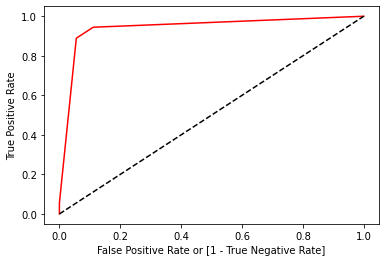

In [1016]:
fpr, tpr, thresholds = roc_curve(y_test, dt_model.predict_proba (X_test)[:,1],pos_label=1)

auc = roc_auc_score(y_test,dt_model.predict_proba(X_test),average='weighted',multi_class="ovr")
print(auc)


import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red',label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### 9. Model Deployement

In [973]:
dump(dt_model,open("wine_analysis.pkl","wb"))

In [974]:
dt_model1 = load(open("wine_analysis.pkl","rb"))

In [975]:
y_pred_test1 = dt_model1.predict(X_test)

In [976]:
print("Accuracy Score            : ",accuracy_score(y_test,y_pred_test1))
print("Confusion Matrix          : \n",confusion_matrix(y_test,y_pred_test1))
print("Classification Report     : \n",classification_report(y_test,y_pred_test1))

Accuracy Score            :  0.8888888888888888
Confusion Matrix          : 
 [[14  0  0]
 [ 2 16  0]
 [ 2  2 18]]
Classification Report     : 
               precision    recall  f1-score   support

           0       0.78      1.00      0.88        14
           1       0.89      0.89      0.89        18
           2       1.00      0.82      0.90        22

    accuracy                           0.89        54
   macro avg       0.89      0.90      0.89        54
weighted avg       0.91      0.89      0.89        54

